# RIS Jupyter and R Data Science Workshop Notebook

#### Original notebook modified with permission from [Randal S. Olson](http://www.randalolson.com/)
#### Licensed by [Creative Commons](https://creativecommons.org/licenses/by/4.0/)

## Assumptions

If you are attending this workshop and wish to follow along and submit a job, it is assumed that:
* Have been assigned a Wash U WUSTL Key Identity
* Are on local Wash U computer networks or have access to the Wash U Medical School VPN
* Have read and comply with the [User Agreement](https://docs.ris.wustl.edu/doc/compute/user-agreement.html#ris-user-agreement).
* Have some familiarity with Python and/or R

## Introduction

In the time it took you to read this sentence, terabytes of data have been collectively generated across the world — more data than any of us could ever hope to process, much less make sense of, on the machines we're using to read this notebook.

In response to this massive influx of data, the field of Data Science has come to the forefront in the past decade. Cobbled together by people from a diverse array of fields — statistics, physics, computer science, design, and many more — the field of Data Science represents our collective desire to understand and harness the abundance of data around us to build a better world.

In this notebook, I'm going to go over a basic Python data exploration workflow.

## The problem

For the purposes of this exercise, let's pretend we were recently hired by a lab at WashU. Our first project is to clean up a data file generated by field researchers in our lab for downstream analysis.

<img src="images/petal_sepal.jpg" />

We've been provided a dataset (iris-data.csv) from our field researchers, which only includes measurements for three types of *Iris* flowers:

### *Iris setosa*

<img src="images/iris_setosa.jpg" />

### *Iris versicolor*
<img src="images/iris_versicolor.jpg" />

### *Iris virginica*
<img src="images/iris_virginica.jpg" />

The four measurements we're using currently come from hand-measurements by the field researchers.

**Note:** The data set we're working with is the famous [*Iris* data set](https://archive.ics.uci.edu/ml/datasets/Iris) — included with this notebook — modified slightly for demonstration purposes.

## Step 1: Answering the question


The first step to any data analysis project is to define the question or problem we're looking to solve, and to define a measure (or set of measures) for our success at solving that task. The data analysis checklist has us answer a handful of questions to accomplish that, so let's work through those questions.

>Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?

We're trying to explore the data provided by the field researchers.

>Did you define the metric for success before beginning?

Let's do that now. Our PI wants to ensure that there are no missing or mis-labeled data in the data set.

>Did you understand the context for the question and the scientific application?

We're building part of a larger data analysis pipeline to study three Iris flowers.

>Did you record the experimental design?

Our PI has told us that the field researchers are hand-measuring 50 randomly-sampled flowers of each species using a standardized methodology. The field researchers take pictures of each flower they sample from pre-defined angles so the measurements and species can be confirmed by the other field researchers at a later point. At the end of each day, the data is compiled and stored on a private lab GitHub repository.

<hr />

Notice that we've spent a fair amount of time working on the problem without writing a line of code or even looking at the data.

**Thinking about and documenting the problem we're working on is an important step to performing effective data analysis that often goes overlooked.** Don't skip it.

## Step 2: Checking the data


The next step is to look at the data we're working with. Even curated data sets from the government can have errors in them, and it's vital that we spot these errors before investing too much time in our analysis.

Generally, we're looking to answer the following questions:

* Is there anything wrong with the data?
* Are there any quirks with the data?
* Do I need to fix or remove any of the data?

Let's start by reading the data into a pandas DataFrame.

In [1]:
import pandas as pd

iris_data = pd.read_csv('iris-data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**One of the first things we should look for is missing data.** Thankfully, the field researchers already told us that they put a 'NA' into the spreadsheet when they were missing a measurement.

We can tell pandas to automatically identify missing values if it knows our missing value marker.

In [2]:
iris_data = pd.read_csv('iris-data.csv', na_values=['NA'])

Next, it's always a good idea to look at the distribution of our data — especially the outliers.

Let's start by printing out some summary statistics about the data set.

In [3]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can see several useful values from this table. For example, we see that five `petal_width_cm` entries are missing.

Tables like this are rarely useful unless we know that our data should fall in a particular range. It's usually better to visualize the data in some way.

Since we know we're going to be plotting in this section, let's set up the notebook so we can plot inside of it.

In [5]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

Next, let's create a **scatterplot matrix**. Scatterplot matrices plot the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. They make for an efficient tool to look for errors in our data.

''

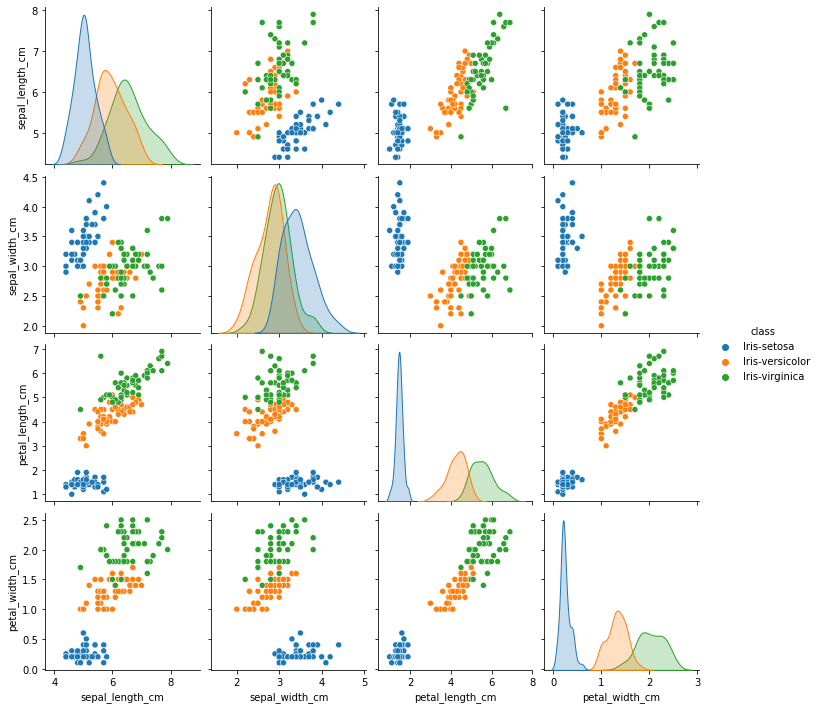

In [22]:
# We have to temporarily drop the rows with 'NA' values
# because the Seaborn plotting function does not know
# what to do with them
sb.pairplot(iris_data.dropna(), hue='class')
;

From the scatterplot matrix, we can already see some issues with the data set.

We need to figure out what to do with the erroneous data. Which takes us to the next step...

## Step 3: Tidying the data

Now that we've identified several errors in the data set, we need to fix them before we proceed with the analysis.

Let's walk through the issues one-by-one.

**There are five classes when there should only be three**

Let's use the DataFrame to fix these errors.

In [9]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**There are some clear outliers in the measurements that may be erroneous**:

In the case of the one anomalous entry for `Iris-setosa`, let's say our field researchers know that it's impossible for `Iris-setosa` to have a sepal width below 2.5 cm. Clearly this entry was made in error, and we're better off just scrapping the entry than spending hours finding out what happened.

''

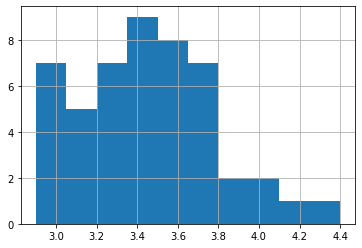

In [10]:
# This line drops any 'Iris-setosa' rows with a separal width less than 2.5 cm
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()
;

The next data issue to address is the several near-zero sepal lengths for the `Iris-versicolor` rows. Let's take a look at those rows.

In [12]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


All of the near-zero `sepal_length_cm` entries seem to be off by two orders of magnitude, as if they had been recorded in meters instead of centimeters.

''

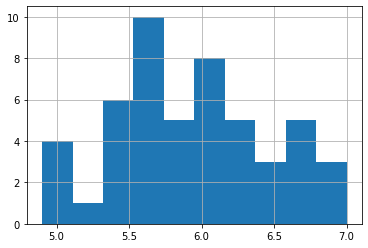

In [13]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()
;

**We had to drop those rows with missing values.**

Let's take a look at the rows with missing values.

In [14]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


One way to deal with missing data is **mean imputation**: If we know that the values for a measurement fall in a certain range, we can fill in empty values with the average of that measurement.

''

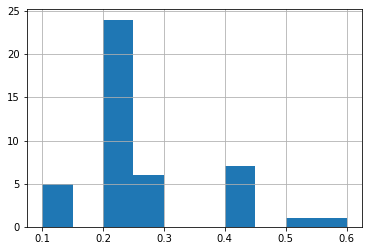

In [15]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()
;

Most of the petal widths for `Iris-setosa` fall within the 0.2-0.3 range, so let's fill in these entries with the average measured petal width.

In [16]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [17]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


**Note:** If you don't feel comfortable imputing your data, you can drop all rows with missing data with the `dropna()` call:

    iris_data.dropna(inplace=True)

After all this hard work, we don't want to repeat this process every time we work with the data set. Let's save the tidied data file *as a separate file* and work directly with that data file from now on.

In [18]:
iris_data.to_csv('iris-data-clean.csv', index=False)

iris_data_clean = pd.read_csv('iris-data-clean.csv')

Now, let's take a look at the scatterplot matrix now that we've tidied the data.

''

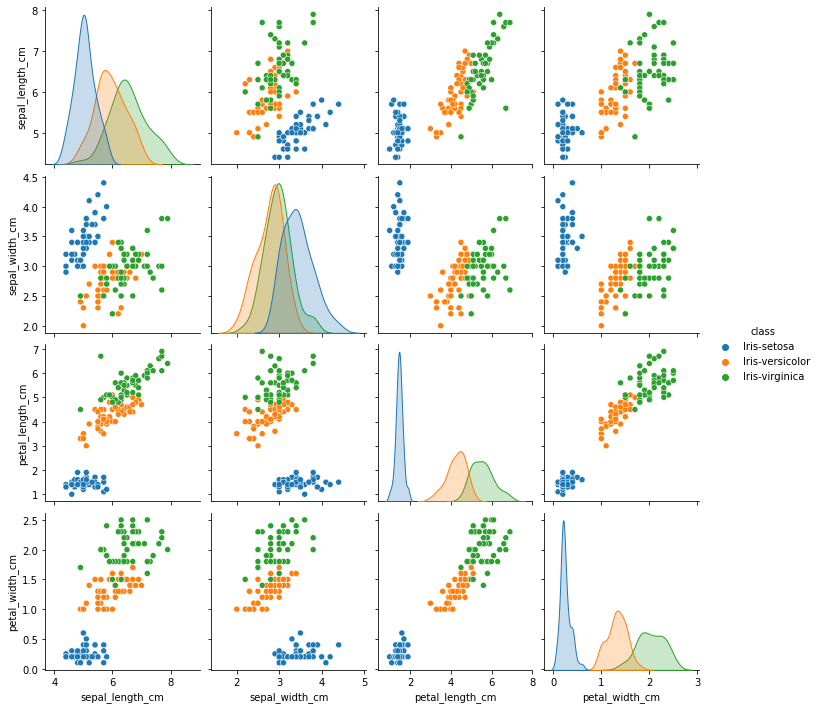

In [19]:
sb.pairplot(iris_data_clean, hue='class')
;

Numerous errors were purposely into this data set to demonstrate some of the many possible scenarios you may face while tidying your data.

The general takeaways here should be:

* Make sure your data is encoded properly

* Make sure your data falls within the expected range, and use domain knowledge whenever possible to define that expected range

* Deal with missing data in one way or another: replace it if you can or drop it

* Never tidy your data manually because that is not easily reproducible

* Use code as a record of how you tidied your data

* Plot everything you can about the data at this stage of the analysis so you can *visually* confirm everything looks correct

## Step 4: Exploratory analysis


Exploratory analysis is the step where we start delving deeper into the data set beyond the outliers and errors. We'll be looking to answer questions such as:

* How is my data distributed?

* Are there any correlations in my data?

* Are there any confounding factors that explain these correlations?

This is the stage where we plot all the data in as many ways as possible.

''

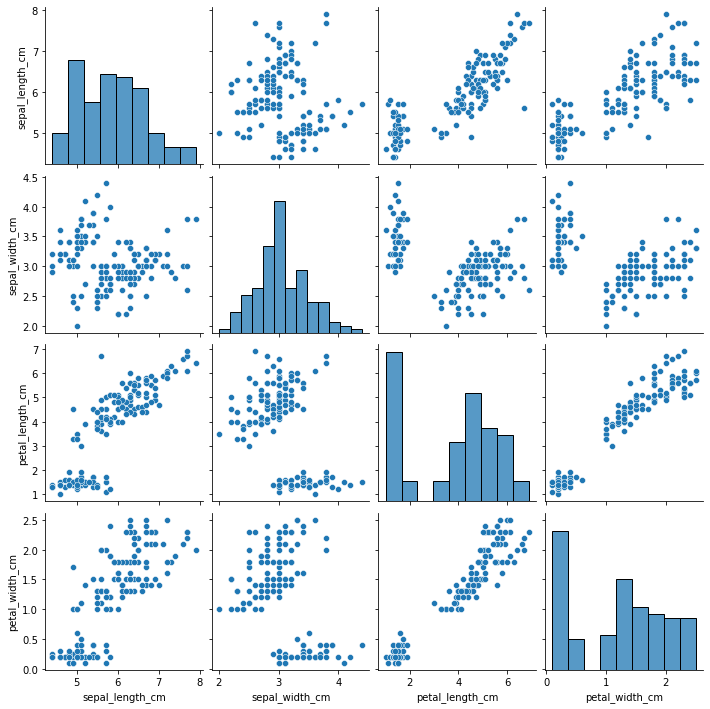

In [20]:
sb.pairplot(iris_data_clean)
;

Our data is normally distributed for the most part.

There's something strange going on with the petal measurements...

''

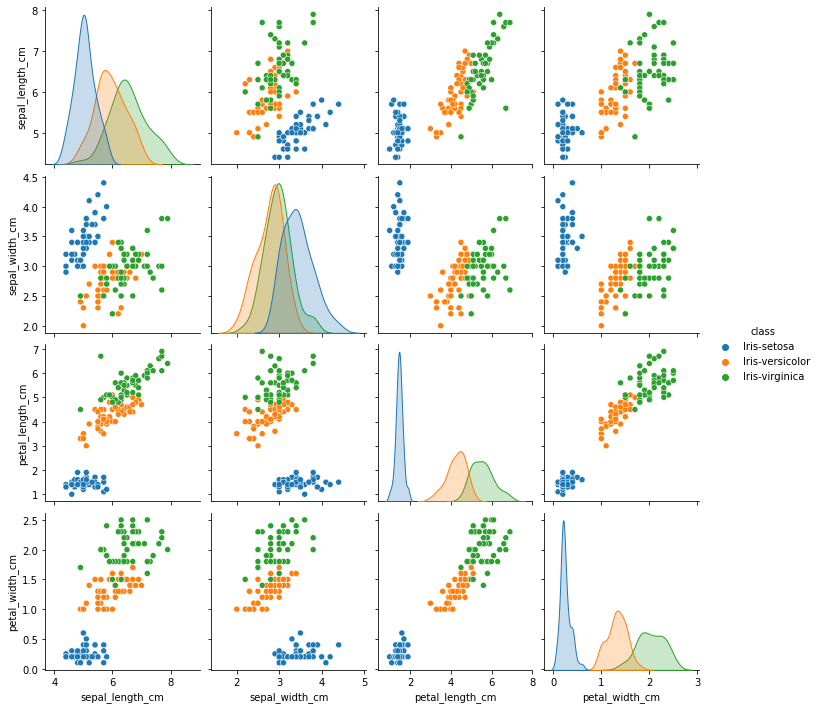

In [21]:
sb.pairplot(iris_data_clean, hue='class')
;

The strange distribution of the petal measurements exist because of the different species.

We can also make **violin plots** of the data to compare the measurement distributions of the classes. Violin plots contain the same information as [box plots](https://en.wikipedia.org/wiki/Box_plot), but also scales the box according to the density of the data.

## Now What??

During today's workshop we performed a basic cleaning and exploration of data to prepare the data for downstream analysis. 

Possible analyses include:
* Classification tasks using machine learning and/or deep learning
* Statistical tests to determine if features of each Iris flower are statistically significant from one another

## About this workshop

The Docker container used for this workshop was the 'datascience' Docker container maintained by Jupyter https://hub.docker.com/r/jupyter/datascience-notebook/

The job submission command to launch this Docker container on the RIS Scientific Compute Platform is
> JUPYTER_ENABLE_LAB=True LSF_DOCKER_PORTS='8888:8888' PATH="/opt/conda/bin:$PATH" bsub -Is -q general-interactive -R 'select[port8888=1]' -a 'docker(jupyter/datascience-notebook:latest)' /usr/local/bin/start-notebook.sh

Please see our [compute-faq](https://docs.ris.wustl.edu/doc/compute/compute-faq.html) for more information on using the Scientific Compute Platform.

If you need help using the Scientific Compute Platform, or have questions about any RIS services, please visit our [service desk](https://servicedesk.ris.wustl.edu/)